In this notebook, we evaluate the trained neural networks. The first part uses the large scale network, and the second is based on its mobile version.

You can use this notebook to evaluate the network in speaker identification and verification task.

Place audio data into a datafolder in the working directory. Structure for identification and verification has to be different:

For speaker verification:
<ul>
    <li>data_folder</li>
    <ul>
       <li>enrollment_data (e.g. 50% of speakers)</li> 
       <li>query_data (e.g. 50% of speakers)</li>
    </ul>
</ul>

For speaker identification:
<ul>
    <li>data_folder</li>
    <ul>
       <li>enrollment_data (e.g. 100% of speakers)</li> 
    </ul>
</ul>

        
For identification all speakers will be enrolled and then all queried. For each query speaker the smallest distance, and the speaker to which the smallest distance was computed is saved. On this basis we evaluate classification/identification.

For verification the method evaluate.verification will return ROC-curve, choosing thresholds automatically based on the predicted similarity scores.

## Speaker verification using large-scale neural embedding network.

In [ ]:
from own_library.speaker_identificationTF import SpeakerIdentificationTf
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

# Verification.
# To use: create enrollment_folder and query_folder
identification = SpeakerIdentificationTf(**{"enrollment_folder": "identification_data/enrollment_folder",
                                            "data_folder": "identification_data",
                                            "model": "pytorch"})

identification.enroll(seq_len=2, num_seq=5, normalize=True)
identification.query(seq_len=2, num_seq=2, normalize=True)
identification.compute_smallest_distances()


In [ ]:
#pytorch
thresholds_cosine = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]

evaluation = identification.evaluate(thresholds_cosine)
y_true = evaluation[0]["y_true"]
y_prob = []
for i in range(len(identification.smallest_distances)):
    y_prob.append(identification.smallest_distances[i]["Distance"])


Thresholds:  [0.9662 0.9069 0.9038 0.8828 0.8758 0.8636 0.8616 0.8568 0.8519 0.8414
 0.8404 0.8383 0.8285 0.8226 0.8212 0.814  0.7916 0.7826 0.7776 0.7727
 0.7714 0.7697 0.7681 0.5976 0.5214]


<Figure size 432x288 with 0 Axes>

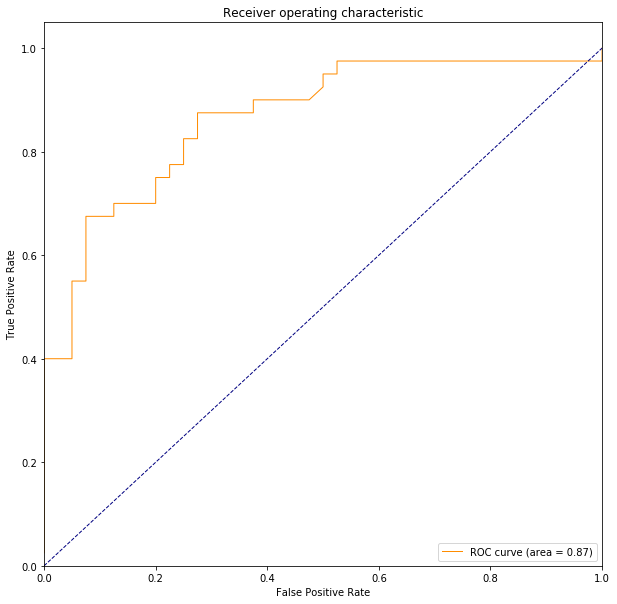

In [26]:
fpr, tpr, thresholds = roc_curve(y_true, y_prob, pos_label=1)
roc_auc = auc(fpr, tpr)
print("Thresholds: ", thresholds)
plt.figure()
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Speaker identification using large-scale neural embedding network.

In [ ]:
from own_library.speaker_identificationTF import SpeakerIdentificationTf

# To use: Put all speaker files into enrollment folder
results=[]
for enroll_num_seq in [1,2,3,4,5,10]:
    for query_num_seq in [1,2,3,4,5,10]:
        identification = SpeakerIdentificationTf(**{"enrollment_folder": "identification_data/enrollment_folder",
                                                "data_folder": "identification_data",
                                                "model": "pytorch"})
        identification.enroll(seq_len=2, num_seq=enroll_num_seq, normalize=True)
        identification.query(seq_len=2, num_seq=query_num_seq, normalize=True)
        identification.compute_smallest_distances()
        accuracy = identification.evaluate_identification()
        print("Enroll_num_seq: ", enroll_num_seq)
        print("Query_num_seq: ", query_num_seq)
        print("Accuracy: ", accuracy)
        results.append({"enroll_num_seq": enroll_num_seq, "query_num_seq": query_num_seq, "accuracy": accuracy})

In [44]:
import pickle
def save_obj(obj, name ):
    with open( name + '.pkl', 'wb') as f:
        pickle.dump(results, f, pickle.HIGHEST_PROTOCOL)

In [45]:
save_obj(results, "results_large_scale_identification")

<Figure size 432x288 with 0 Axes>

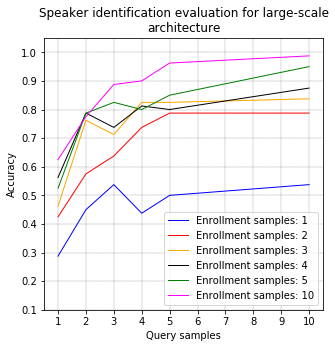

In [65]:
from textwrap import wrap
plt.figure()
plt.figure(figsize=(5, 5))
query_num_samples = [1, 2, 3, 4, 5, 10]

#Enrollment 1
accuracies_1 = [results[i]["accuracy"] for i in range(0, 6)]
plt.plot(query_num_samples, accuracies_1, color='blue', lw=1, label='Enrollment samples: 1')

#Enrollment 2
accuracies_2 = [results[i]["accuracy"] for i in range(6, 12)]
plt.plot( query_num_samples, accuracies_2, color='red', lw=1, label='Enrollment samples: 2')
         
#Enrollment 3
accuracies_3 = [results[i]["accuracy"] for i in range(12, 18)]
plt.plot(query_num_samples, accuracies_3, color='orange', lw=1, label='Enrollment samples: 3')
         
#Enrollment 4
accuracies_4 = [results[i]["accuracy"] for i in range(18, 24)]
plt.plot(query_num_samples, accuracies_4, color='black', lw=1, label='Enrollment samples: 4')
         
#Enrollment 5
accuracies_5 = [results[i]["accuracy"] for i in range(24, 30)]
plt.plot(query_num_samples, accuracies_5, color='green', lw=1, label='Enrollment samples: 5')

#Enrollment 10
accuracies_10 = [results[i]["accuracy"] for i in range(30, 36)]
plt.plot(query_num_samples, accuracies_10, color='magenta', lw=1, label='Enrollment samples: 10')
         
plt.xlim([0.5, 10.5])
plt.ylim([0.1, 1.05])
plt.xticks(range(1, 11))
plt.yticks([i * 0.1 for i in range(1, 11)])
plt.grid(color='black', linestyle='--', linewidth=0.2)

plt.xlabel('Query samples')
plt.ylabel('Accuracy')
#plt.title('Speaker identification evaluation for large-scale architecture')
plt.title("\n".join(wrap('Speaker identification evaluation for large-scale architecture', 50)))

plt.legend(loc="lower right")
plt.savefig('test.pdf', format='pdf', dpi=900) 
plt.show()

## Speaker identification using mobile neural embedding network.

In [ ]:
from own_library.speaker_identificationTF import SpeakerIdentificationTf

# Verification.
# To use: create enrollment_folder and query_folder
#identification = SpeakerIdentificationTf(**{"enrollment_folder": "test_data_clean/enrollment_folder",
#                                            "data_folder": "test_data_clean",
#                                            "model": "tensorflow"})
#####
# Recognition/classification
# To use: Put all speaker files into enrollment folder
results=[]
for enroll_num_seq in [1,2,3,4,5,10]:
    for query_num_seq in [1,2,3,4,5,10]:
        identification = SpeakerIdentificationTf(**{"enrollment_folder": "identification_data/enrollment_folder",
                                                "data_folder": "identification_data",
                                                "model": "tensorflow"})
        identification.enroll(seq_len=3.58, num_seq=enroll_num_seq, normalize=False)
        identification.query(seq_len=3.58, num_seq=query_num_seq, normalize=False)
        identification.compute_smallest_distances()
        accuracy = identification.evaluate_identification()
        print("Enroll_num_seq: ", enroll_num_seq)
        print("Query_num_seq: ", query_num_seq)
        print("Accuracy: ", accuracy)
        results.append({"enroll_num_seq": enroll_num_seq, "query_num_seq": query_num_seq, "accuracy": accuracy})

In [4]:
import pickle
def save_obj(obj, name ):
    with open( name + '.pkl', 'wb') as f:
        pickle.dump(results, f, pickle.HIGHEST_PROTOCOL)

In [7]:
save_obj(results, "results_mobile_identification")

### Plot results.
We will show the influence of the number of sequences sampled for enrollment and query on the accuracy.

[0.875, 0.925, 0.975, 0.95, 0.9375, 0.975]
[0.8, 0.95, 0.975, 0.95, 0.9375, 0.975]


<Figure size 432x288 with 0 Axes>

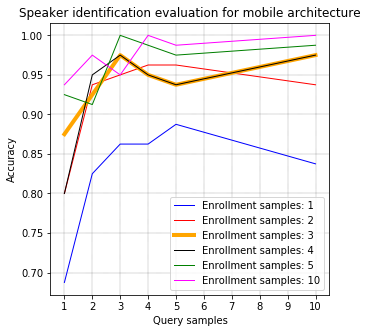

In [40]:
plt.figure()
plt.figure(figsize=(5, 5))
query_num_samples = [1, 2, 3, 4, 5, 10]

#Enrollment 1
accuracies_1 = [results[i]["accuracy"] for i in range(0, 6)]
plt.plot(query_num_samples, accuracies_1, color='blue', lw=1, label='Enrollment samples: 1')

#Enrollment 2
accuracies_2 = [results[i]["accuracy"] for i in range(6, 12)]
plt.plot( query_num_samples, accuracies_2, color='red', lw=1, label='Enrollment samples: 2')
         
#Enrollment 3
accuracies_3 = [results[i]["accuracy"] for i in range(12, 18)]
plt.plot(query_num_samples, accuracies_3, color='orange', lw=4, label='Enrollment samples: 3')
         
#Enrollment 4
accuracies_4 = [results[i]["accuracy"] for i in range(18, 24)]
plt.plot(query_num_samples, accuracies_4, color='black', lw=1, label='Enrollment samples: 4')
         
#Enrollment 5
accuracies_5 = [results[i]["accuracy"] for i in range(24, 30)]
plt.plot(query_num_samples, accuracies_5, color='green', lw=1, label='Enrollment samples: 5')

#Enrollment 10
accuracies_10 = [results[i]["accuracy"] for i in range(30, 36)]
plt.plot(query_num_samples, accuracies_10, color='magenta', lw=1, label='Enrollment samples: 10')
         
plt.xlim([0.5, 10.5])
plt.xticks(range(1, 11))
plt.grid(color='black', linestyle='--', linewidth=0.2)

plt.xlabel('Query samples')
plt.ylabel('Accuracy')
plt.title('Speaker identification evaluation for mobile architecture')
plt.legend(loc="lower right")
plt.savefig('test.pdf', format='pdf', dpi=900) 
plt.show()

## Speaker verification using mobile neural embedding network.

In [ ]:
from own_library.speaker_identificationTF import SpeakerIdentificationTf
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt


identification = SpeakerIdentificationTf(**{"enrollment_folder": "test_data_clean/enrollment_folder",
                                            "data_folder": "test_data_clean",
                                            "model": "tensorflow"})

identification.enroll(seq_len=3.58, num_seq=5, normalize=False)
identification.query(seq_len=3.58, num_seq=2, normalize=False)
identification.compute_smallest_distances()

[0.9961 0.992  0.9903 0.9886 0.9876 0.9864 0.9859 0.9466 0.9452 0.9428
 0.9304 0.9302 0.9273 0.9255 0.9163 0.9149 0.8161]


<Figure size 432x288 with 0 Axes>

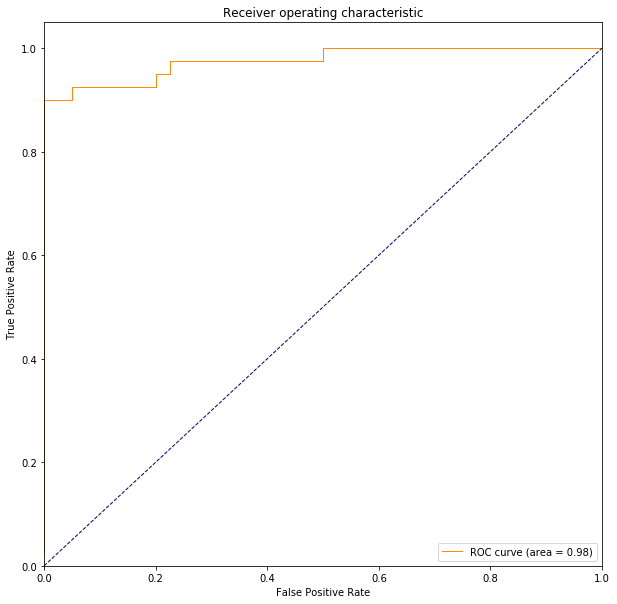

In [23]:
thresholds_cosine = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
evaluation = identification.evaluate(thresholds_cosine)
y_true = evaluation[0]["y_true"]
y_prob = []
fpr, tpr, thresholds = roc_curve(y_true, y_prob, pos_label=1)
print(thresholds)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()